In [4]:
import cv2
import numpy as np
from keras.models import load_model
import pandas as pd
import matplotlib.pyplot as plt

def detect_mask(IPath):
    #model=load_model("my_model.h5")
    model=load_model("Mask_Detector.h5")
    results={0:'without mask',1:'mask'}
    GR_dict={0:(255,0,0),1:(0,0,255)}
    rect_size = 4
   
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

    im = cv2.imread(IPath)

    plt.imshow(im)
    plt.show()

    im=cv2.flip(im,1,1) 

    rerect_size = cv2.resize(im, (im.shape[1] // rect_size, im.shape[0] // rect_size))
    faces = face_cascade.detectMultiScale(rerect_size)

    for f in faces:
        (x, y, w, h) = [v * rect_size for v in f] 

        print(x, y, w, h)

        face_img = im[y:y+h, x:x+w]


        plt.imshow(face_img)
        plt.show()

        rerect_sized=cv2.resize(face_img,(150,150))

        plt.imshow(rerect_sized)
        plt.show()

        normalized=rerect_sized/255.0

        plt.imshow(normalized)
        plt.show()

        reshaped=np.reshape(normalized,(1,150,150,3))

        reshaped = np.vstack([reshaped])

        result=model.predict(reshaped)

        print('Result Probabilities: ',result)

        label=np.argmax(result,axis=1)[0]

        print('Result label: ',label)

        print('Result:',results[label])

        cv2.rectangle(im,(x,y),(x+w,y+h),GR_dict[label],2)
        cv2.rectangle(im,(x,y-40),(x+w,y),GR_dict[label],-1)
        cv2.putText(im, results[label], (x, y-20),cv2.FONT_HERSHEY_SIMPLEX,0.8,(255,255,255),2)

        plt.imshow(im)
        plt.show()
        

Test Case # 1  :


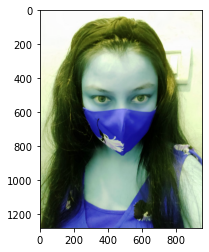

200 284 572 572


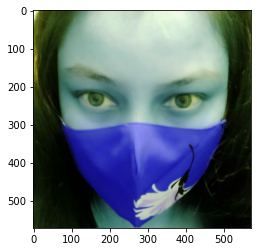

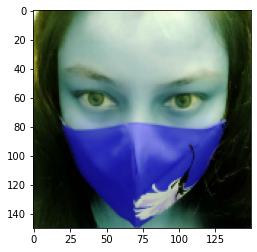

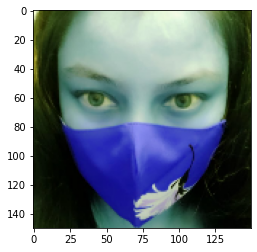

Result Probabilities:  [[0.19402201 0.805978  ]]
Result label:  1
Result: mask


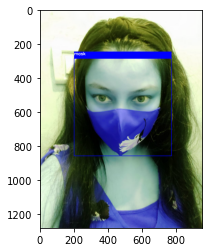

---------------------------------------------

Test Case # 2  :


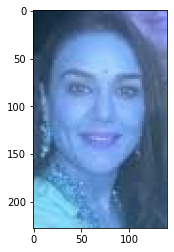

8 44 112 112


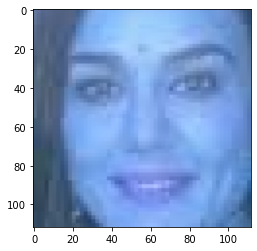

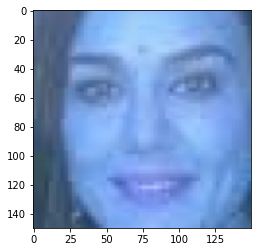

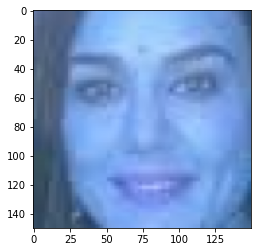

Result Probabilities:  [[0.8251656 0.1748344]]
Result label:  0
Result: without mask


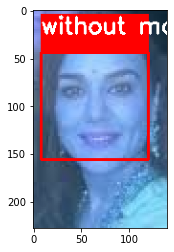

---------------------------------------------

Test Case # 3  :


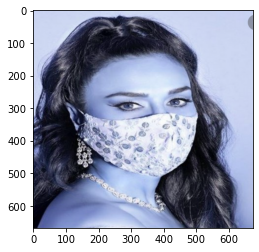

136 148 360 360


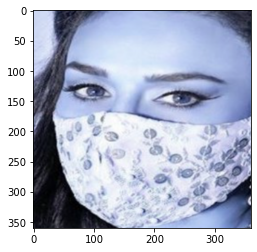

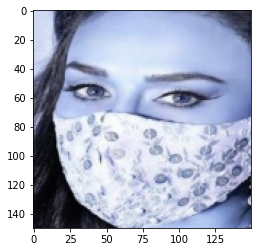

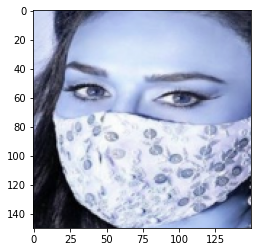

Result Probabilities:  [[0.29288387 0.7071161 ]]
Result label:  1
Result: mask


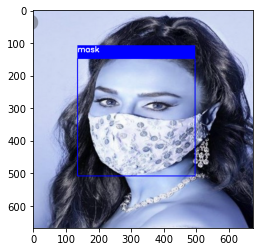

---------------------------------------------



In [5]:
IPath_list = [r'test/SoniaLaskar_Mask_test.jpg',r'test/PZ_without_mask.jpg',
             r'test/test_Preity_2.jpg']
for i in IPath_list:
    
    print('Test Case #',IPath_list.index(i)+1,' :')
    detect_mask(i)
    print('---------------------------------------------\n')